In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [3]:
url = 'https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/dataset.csv'
df = pd.read_csv(url,error_bad_lines=False)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,target
0,7.547600,0.151261,557.132466,354.008599,0.301029,55.282594,9635.211683,2.0,1.0,9461.469590
1,3.140491,0.794497,837.116189,104.515774,0.110622,88.516243,9425.041942,2.0,5.0,10257.271938
2,2.064447,0.236500,313.757354,259.127993,0.729964,88.350465,9115.661199,1.0,5.0,8719.214483
3,9.099262,0.453953,661.409826,466.070226,0.432750,21.516152,9584.310016,3.0,2.0,9165.197338
4,5.264564,0.683869,344.154511,485.441053,0.085599,90.308205,9193.271575,2.0,1.0,9458.427537


In [5]:
df.shape

(900, 10)

In [6]:
def scatter_plot(feature,target):
    plt.figure(figsize=(8,4))
    plt.scatter(df[feature],df[target],c='black')
    plt.xlabel(''.format(feature))
    plt.ylabel('target')
    plt.show()

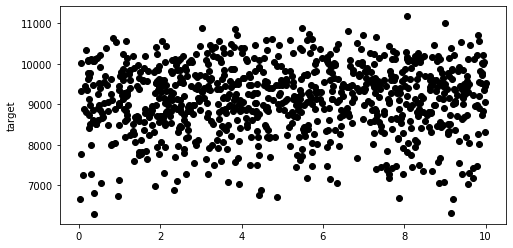

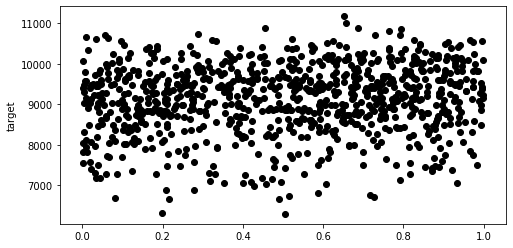

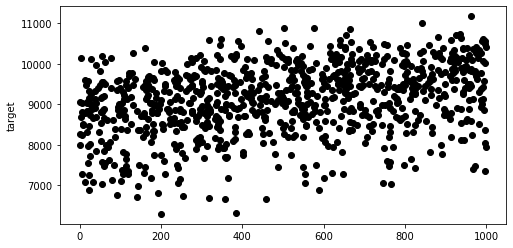

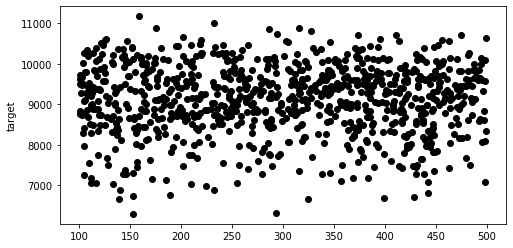

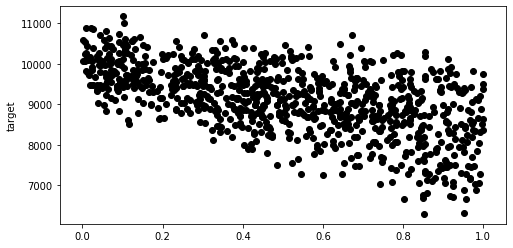

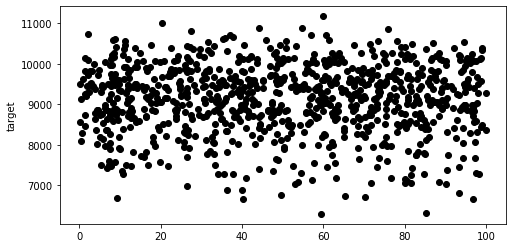

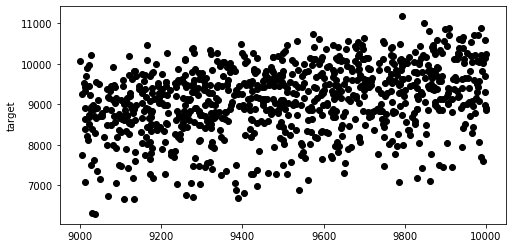

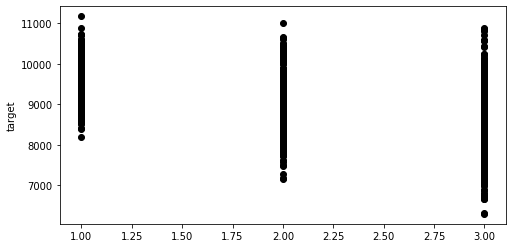

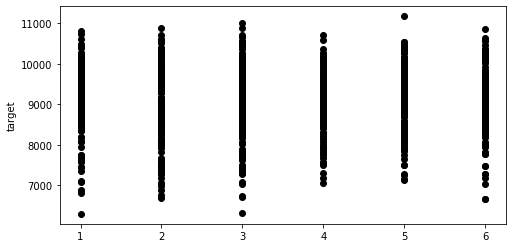

In [7]:
scatter_plot('0','target')
scatter_plot('1','target')
scatter_plot('2','target')
scatter_plot('3','target')
scatter_plot('4','target')
scatter_plot('5','target')
scatter_plot('6','target')
scatter_plot('7','target')
scatter_plot('8','target')

In [8]:
df.corr()

,0,1,2,3,4,5,6,7,8,target
0,1.000000,-0.027976,0.001554,0.018856,0.030425,-0.029911,0.030320,-0.000798,-0.047267,0.037680
1,-0.027976,1.000000,0.022259,0.005437,-0.003908,0.064851,0.032477,-0.026225,0.013331,0.110671
2,0.001554,0.022259,1.000000,-0.034736,0.041097,-0.032970,-0.014150,0.005294,0.037880,0.318919
3,0.018856,0.005437,-0.034736,1.000000,0.010034,-0.031301,0.030401,0.003266,0.006460,-0.007499
4,0.030425,-0.003908,0.041097,0.010034,1.000000,0.021101,0.080562,-0.069681,-0.008745,-0.578062
5,-0.029911,0.064851,-0.032970,-0.031301,0.021101,1.000000,0.030859,0.069366,0.065564,-0.017835
6,0.030320,0.032477,-0.014150,0.030401,0.080562,0.030859,1.000000,-0.080173,0.020134,0.316284
7,-0.000798,-0.026225,0.005294,0.003266,-0.069681,0.069366,-0.080173,1.000000,-0.006322,-0.463050
8,-0.047267,0.013331,0.037880,0.006460,-0.008745,0.065564,0.020134,-0.006322,1.000000,0.023457
target,0.037680,0.110671,0.318919,-0.007499,-0.578062,-0.017835,0.316284,-0.463050,0.023457,1.000000


In [9]:
x=df.drop('target',axis=1)
y=df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)
print(X_train.shape);
print(X_test.shape)

(630, 9)
(270, 9)


Linear Regression

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
lr.score(X_test,y_test)

0.8234938324270977

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

353.1953554950121
0.8298000653652582


In [12]:
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

353.60611413167896
0.8234938324270977


In [13]:
from sklearn.model_selection import GridSearchCV
Ri = Ridge()
param_ridge = {'alpha': np.arange(0.01,1,0.1)}
GS_ridge = GridSearchCV(Ri, param_ridge, cv = 5)
GS_ridge.fit(x,y)
GS_ridge.best_params_

{'alpha': 0.11}

In [14]:
rr = Ridge(alpha=0.11)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

353.19742178882444
0.8297980739228734
353.6099578794464
0.8234899951129346


In [15]:
from sklearn.model_selection import GridSearchCV
Ri = Lasso()
param_lasso = {'alpha': np.arange(0.01,1,0.1)}
GS_lasso = GridSearchCV(Ri, param_lasso, cv = 5)
GS_lasso.fit(x,y)
GS_lasso.best_params_

{'alpha': 0.41000000000000003}

In [16]:
model_lasso = Lasso(alpha=0.41000000000000003)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

353.20173255131687
0.8297939192801087
353.56492511315037
0.8235349498857301


In [41]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=4,min_samples_split=2,loss='ls')

In [42]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4)

In [43]:
clf.score(X_test,y_test)#Here gradient booster gives us a good accuracy.....

0.864249031164867

In [44]:
ur2= 'https://raw.githubusercontent.com/cctech-labs/challenges/master/2020/06/hiring/resources/data_science/prediction.csv'
df2 = pd.read_csv(ur2,error_bad_lines=False)
df2.head()

,0,1,2,3,4,5,6,7,8
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1.0,5.0
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2.0,3.0
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2.0,3.0
3,4.126340,0.685302,73.330815,169.578437,0.828849,81.691968,9044.806270,2.0,5.0
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1.0,5.0


In [45]:
pred_clf=clf.predict(df2)

In [46]:
pred_clf

array([ 9394.49093294, 10042.58407932,  9710.17591932,  7688.70558593,
        9801.10279992,  9946.67279231,  8515.91563353, 10289.8197547 ,
        9049.43349443,  8764.71989565,  8749.07797181, 10353.98306795,
        9771.34743421,  8276.22612749,  8479.90290142,  9659.21925792,
        8982.82447473, 10825.0350045 ,  7786.66752299,  9550.75205805,
        9682.38624017,  7261.69919905,  9203.1648278 ,  7731.90885838,
       10487.08483935,  8508.8978818 ,  9145.41356576,  9284.70579683,
        7823.92419927,  9189.24126509, 10464.92861002,  9398.29555184,
        9056.12825824,  9319.13683046,  9968.63740305, 10763.77311405,
       10013.53325645,  8779.20244655,  9358.19738391,  9359.27242743,
       10636.32100001,  9698.66629701,  9099.59519532,  8644.83380882,
        9374.82271401,  9970.82725688, 10059.57693564,  9800.5157739 ,
        9835.96269352,  9885.93163233,  9393.22830566,  8952.58519743,
        9101.16510186,  7897.56794428,  9291.04968483,  9947.52929576,
      

In [47]:
dataset = pd.DataFrame({'target':pred_clf})
dataset.shape

(100, 1)

In [48]:
result= pd.concat([df2,dataset],axis=1)
result.head()

,0,1,2,3,4,5,6,7,8,target
0,8.243945,0.442707,814.191463,437.449497,0.820757,66.358208,9321.584760,1.0,5.0,9394.490933
1,0.450469,0.734878,690.536337,337.971868,0.163483,88.966042,9653.465215,2.0,3.0,10042.584079
2,5.805761,0.412531,225.544432,468.295427,0.254678,27.853712,9840.535247,2.0,3.0,9710.175919
3,4.126340,0.685302,73.330815,169.578437,0.828849,81.691968,9044.806270,2.0,5.0,7688.705586
4,8.082666,0.449977,526.274384,308.148895,0.737136,30.420377,9916.538668,1.0,5.0,9801.102800


In [49]:
result.to_csv(r'C:\\Users\\Subrat\\Downloads\\resultcct1.csv', index=False)